<a href="https://colab.research.google.com/github/caiom26/AnaliseDeDados/blob/main/Shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
MAll=pd.read_csv('dados/Mall_Customers.csv')

In [3]:
MAll.sample(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
27,28,Male,35,28,61
41,42,Male,24,38,92
174,175,Female,52,88,13
115,116,Female,19,65,50
159,160,Female,30,78,73
90,91,Female,68,59,55


Queremos entender um pouco mais desse público

In [3]:
MAll.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
Mall=MAll

In [5]:
Mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
Mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
Mall=Mall.set_index('CustomerID')

In [7]:
Mall.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
cnt=Mall['Gender'].value_counts()
print (cnt)

In [ ]:
Mall.columns

*Agora queremos entender um pouco mais o perfil desse público em relação comparando os gêneros, em relação a duas variáveis, idade e renda anual*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


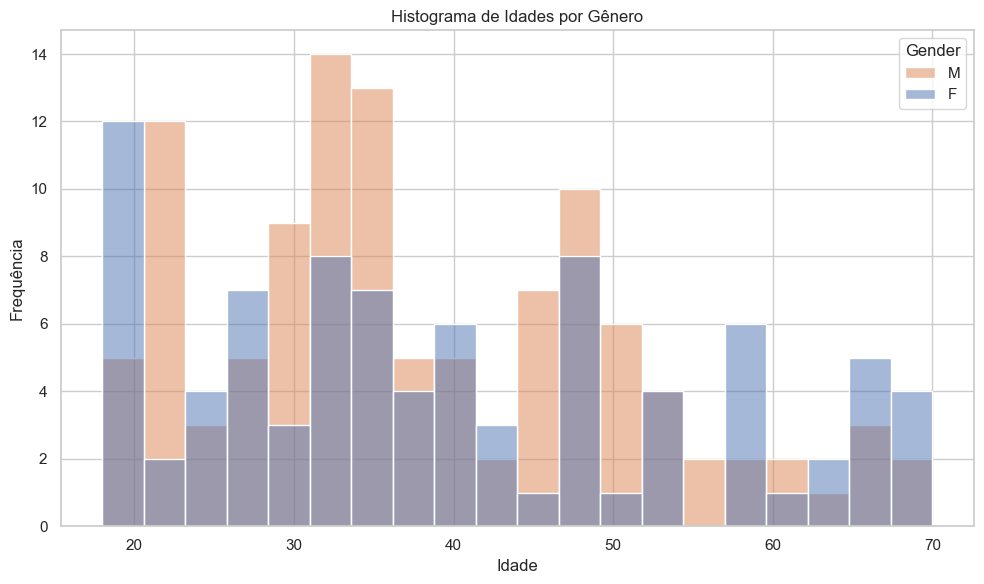

In [8]:
sns.set(style="whitegrid")

# Criar o histograma dividido por gênero, tendo em vista a idade
plt.figure(figsize=(10, 6))
sns.histplot(data=Mall, x="Age", hue="Gender", bins=20)

# Personalizar o gráfico
plt.title('Histograma de Idades por Gênero')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend(title='Gênero')
plt.tight_layout()

plt.legend(title='Gender', labels=['M', 'F'])

# Exibir o gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


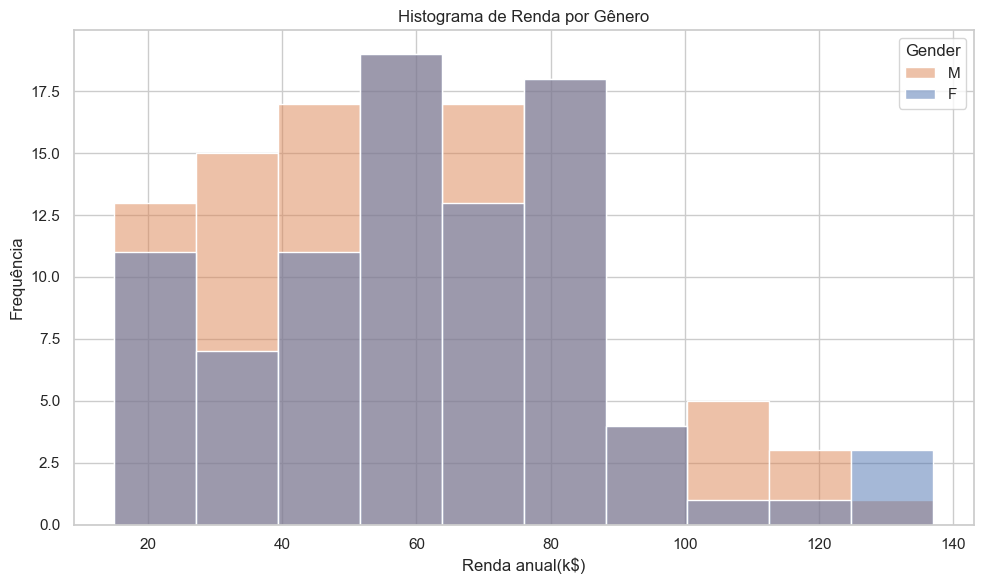

In [9]:
sns.set(style="whitegrid")

# Criar o histograma dividido por gênero tendo como variável a renda anual
plt.figure(figsize=(10, 6))
sns.histplot(data=Mall, x="Annual Income (k$)", hue="Gender")

# Personalizar o gráfico
plt.title('Histograma de Renda por Gênero')
plt.xlabel('Renda anual(k$)')
plt.ylabel('Frequência')
plt.legend(title='Gênero')
plt.tight_layout()

plt.legend(title='Gender', labels=['M', 'F'])

# Exibir o gráfico
plt.show()

Agora eu quero entender quais as correlações entre as varíaveis

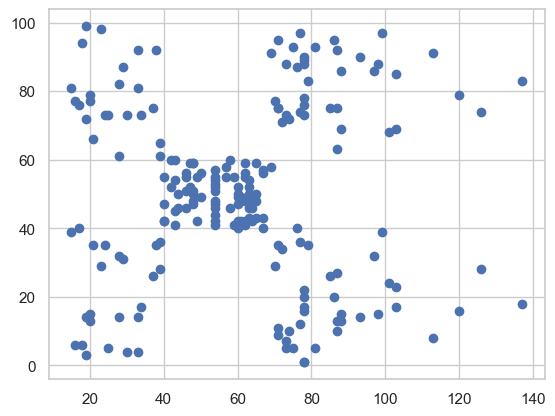

In [10]:
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=Mall)

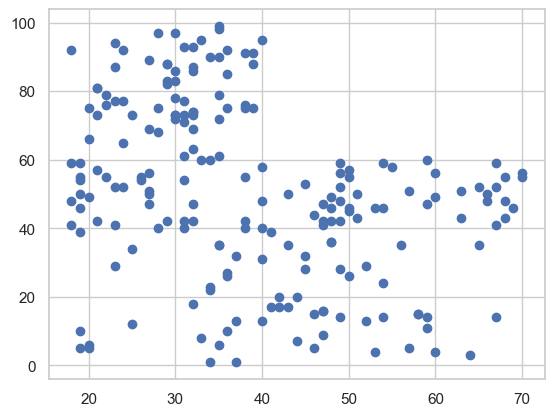

In [11]:
plt.scatter(x='Age', y='Spending Score (1-100)', data=Mall)

Não foi possível enxergar nenhuma correlação entre os parâmetros.
Agora, faremos uma clusterização para verificar quais são os Segmentos nos quais podemos subdividir o público deste shopping.

In [13]:
!pip install yellowbrick


     -------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00


In [14]:
from yellowbrick.cluster import kelbow_visualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans,DBSCAN,MeanShift
from sklearn.cluster import k_means,dbscan,mean_shift,estimate_bandwidth
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale,minmax_scale

In [22]:
Mall_LE=Mall.copy()
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Mall_LE['Gender']=LE.fit_transform(Mall_LE['Gender'])

In [23]:
Mall_LE.sample(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
149,0,34,78,22
19,1,52,23,29
198,1,32,126,74


C:\Users\caiom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


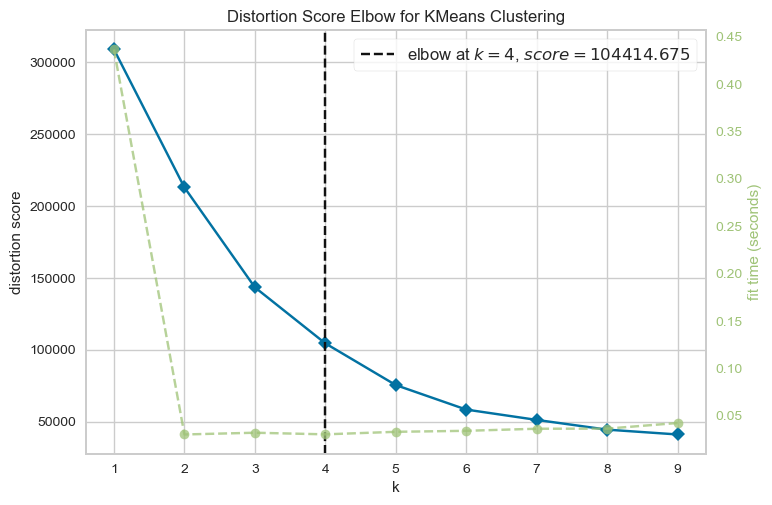

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

In [16]:
kelbow_visualizer(KMeans(),Mall_LE,k=(1,10))

In [27]:
clustermetrics=silhouette_score,davies_bouldin_score,calinski_harabasz_score
cluster_metrics_results=[]
for k in range(3,10):
    model=KMeans(n_clusters=k)
    model.fit_predict(Mall_LE)
    cluster_results_dict={'k':k}
    cluster_results_dict['intertia']=model.inertia_
    for metric in clustermetrics:
        cluster_results_dict[metric.__name__]=metric(Mall_LE,model.labels_)
    cluster_metrics_results.append(cluster_results_dict)
cluster_metrics_results    


[{'k': 3,
  'intertia': 143391.5923603568,
  'silhouette_score': 0.383798873822341,
  'davies_bouldin_score': 0.8750649004457002,
  'calinski_harabasz_score': 113.66664386810282},
 {'k': 4,
  'intertia': 104422.8349853975,
  'silhouette_score': 0.40553486600451777,
  'davies_bouldin_score': 0.8868197593350462,
  'calinski_harabasz_score': 127.9097243065194},
 {'k': 5,
  'intertia': 75427.71182424155,
  'silhouette_score': 0.44424291275274114,
  'davies_bouldin_score': 0.8196433344356222,
  'calinski_harabasz_score': 150.87193020100148},
 {'k': 6,
  'intertia': 58348.64136331505,
  'silhouette_score': 0.45205475380756527,
  'davies_bouldin_score': 0.7475215820921527,
  'calinski_harabasz_score': 166.58349562213596},
 {'k': 7,
  'intertia': 51130.69008126376,
  'silhouette_score': 0.4409411333609709,
  'davies_bouldin_score': 0.7892608969186619,
  'calinski_harabasz_score': 162.14056670354336},
 {'k': 8,
  'intertia': 44355.31351771352,
  'silhouette_score': 0.427541566977401,
  'davies_

In [28]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Purples',subset=['silhouette_score','davies_bouldin_score'])

,intertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
3,143391.592360,0.383799,0.875065,113.666644
4,104422.834985,0.405535,0.886820,127.909724
5,75427.711824,0.444243,0.819643,150.871930
6,58348.641363,0.452055,0.747522,166.583496
7,51130.690081,0.440941,0.789261,162.140567
8,44355.313518,0.427542,0.859095,163.566473
9,40699.845231,0.409287,0.887386,157.307057


Como procuramos Maximizar o Slhouette e o Calisnky-Harabasz  e Minimizar a Inercia e o Davies_Bouldin, optamos por utilizar 6 clusters diferentes 

In [29]:
model=KMeans(n_clusters=6)
model.fit(Mall_LE)
Mall_LE['Cluster']=model.fit_predict(Mall_LE)
Mall_LE.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,1,19,15,39,5
2,1,21,15,81,1
3,0,20,16,6,5
4,0,23,16,77,1
5,0,31,17,40,5


In [30]:
kmeans_labels=Mall_LE['Cluster']

In [38]:
Mall_LE.replace({1:'Male',0:'Female'})

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,Male,19,15,39,5
2,Male,21,15,81,Male
3,Female,20,16,6,5
4,Female,23,16,77,Male
5,Female,31,17,40,5
...,...,...,...,...,...
196,Female,35,120,79,2
197,Female,45,126,28,3
198,Male,32,126,74,2


In [39]:
!pip install -q powerbiclient
from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication
device_auth = DeviceCodeLoginAuthentication()
relatorio_PBI = QuickVisualize(get_dataset_config(Mall_LE), auth = device_auth)
relatorio_PBI


Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code ENWMFH95R to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


QuickVisualize()

In [36]:
relatorio_PBI = QuickVisualize(get_dataset_config(Mall_LE), auth = device_auth)
relatorio_PBI


QuickVisualize()

In [37]:
device_auth = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code ALB6NJG6U to authenticate.


RuntimeError: Authentication failed. Try again.
Details: AADSTS70016: OAuth 2.0 device flow error. Authorization is pending. Continue polling. Trace ID: 2466253d-4503-480f-a599-56c0de3d0c00 Correlation ID: fc5194c9-82f4-4b8f-afdb-372b369e81f1 Timestamp: 2024-10-25 14:29:50Z

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.0,23.5,40.0,59.0
1,1.0,41.5,80.0,16.5
2,0.0,50.0,48.0,44.5
3,0.0,32.0,78.5,83.0


Características de cada cluster :
CLuster 0:  Podemos verificar um grupo que realiza muitas compras no shopping, não possui uma renda elevada e com uma demografia jovem, predominantemente de grupo feminino
CLuster 1: Podemos verificar um Cluster que não realiza muitas compras no shopping,  possui uma renda elevada e com uma demografia não tão jovem.É um grupo majoritariamente composto por homens  
CLuster 2: É um cluster similar ao primeiro cluster porém com uma idade mais elevada, e que realiza menos compras  no shopping
Cluster 3: É o cluster das clientes mais fiéis do shopping, contribuem bastante para a receita do shoppping, tem uma demográfia média de idade adulta, possuem elevada renda e elevados gastos no shopping





Intervenções para cada cluster
0:Por ser um grupo que ja realiza muitas compras no shopping e não possui uma renda elevada, geralmente esse grupo associa muitas compras em relação ao preço. Portanto para aumentar o cross seling é possível pensar na instalação do amazon locker para que caso peçam compras pela internet, vão ao shopping.  
1:Por ser o cluster majoritariamente masculino, realizar campanhas de marketing direcionadas a este público, para que ele se assemelhe e realize mais compras.
2:Envio de mensagens com promoções das lojas, para que as clientes vão ao shopping, comprem o relatado na promoção e comprem outras coisas mais  
3: É o tipo de cliente ideal do shopping. É a cliente que necessita ser fidelizada.Portanto  a ideia aqui é a partir de certa quantidade de dinheiro de compras anuais, o vallet do shopping passará a ser gratuito, ou quais quer outros benefícios.